# **Project Name**    -  **Amazon Prime TV Shows and Movies**



##### **Project Type**    - EDA On Amazon Prime TV Shows and Movies
##### **Contribution**    - Individual

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?
Regional Availability: How does content distribution vary across different regions?
Trends Over Time: How has Amazon Prime’s content library evolved?
IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?
By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

#### **Define Your Business Objective?**

*** Analyse Amazon Prime Video data to identify trends and insights ***


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ** Dataset Description **

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +9k unique titles on Amazon Prime with 15 columns containing their information, including:

id: The title ID on JustWatch.
title: The name of the title.
show_type: TV show or movie.
description: A brief description.
release_year: The release year.
age_certification: The age certification.
runtime: The length of the episode (SHOW) or movie.
genres: A list of genres.
production_countries: A list of countries that produced the title.
seasons: Number of seasons if it's a SHOW.
imdb_id: The title ID on IMDB.
imdb_score: Score on IMDB.
imdb_votes: Votes on IMDB.
tmdb_popularity: Popularity on TMDB.
tmdb_score: Score on TMDB.
And over +124k credits of actors and directors on Amazon Prime titles with 5 columns containing their information:

person_ID: The person ID on JustWatch.
id: The title ID on JustWatch.
name: The actor or director's name.
character_name: The character name.
role: ACTOR or DIRECTOR.
Problem Statement

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?
Regional Availability: How does content distribution vary across different regions?
Trends Over Time: How has Amazon Prime’s content library evolved?
IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?
By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

```
Main Libraries to be used:
```

Pandas for data manipulation, aggregation
Matplotlib and Seaborn for visualization and behavior with respect to the target variable. Use at least 5 different visualizations.
NumPy for computationally efficient operations

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset for PaisaBazaar
def loaddataset():
    ''' Loading 2 datasets as required
    * titles.csv -------(tls)
    * credits.csv ------(crds)'''

    titles = pd.read_csv("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data/titles.csv")
    credits = pd.read_csv("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data/credits.csv")

    print(''' Loading 2 datasets as required
    * titles.csv -------(tls)
    * credits.csv ------(crds)''')

    return titles,credits

In [4]:
titles, credits = loaddataset() #loading the dataset of titles and credits from

 Loading 2 datasets as required
    * titles.csv -------(tls)
    * credits.csv ------(crds)


### Dataset First View

In [5]:
# Dataset copied first
tls = titles.copy()
crds = credits.copy()

In [6]:
# Convert stringified lists into actual Python lists
import ast
tls['genres'] = tls['genres'].apply(lambda x: ast.literal_eval(x))
tls['production_countries'] = tls['production_countries'].apply(lambda x: ast.literal_eval(x))

# This “explodes” list entries so that each genre/country gets its own row.
tls = tls.explode('genres')
tls = tls.explode('production_countries')

In [7]:
tls.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,US,26.0,tt0850645,8.6,1092.0,15.424,7.6


In [8]:
tls.tail(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,family,NaN,NaN,tt14331982,8.4,49.0,0.645,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,drama,NaN,NaN,tt14331982,8.4,49.0,0.645,NaN
9870,ts275838,Waking Up Eighty,SHOW,"Kara Stewart, 16, is fed up with just about ev...",2021,NaN,10,drama,NaN,1.0,tt13542552,NaN,NaN,NaN,NaN


In [9]:
crds.head(3)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR


In [10]:
crds.tail(3)

,person_id,id,name,character,role
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR
124234,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR


### Dataset Rows & Columns count

In [11]:
# DataBase Total Rows & Columns
crds.shape, tls.shape

((124235, 5), (25824, 15))

### Dataset Information

In [12]:
# Dataset Info
crds.info(), tls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 25824 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25824 non-null  object 
 1   title                 25824 non-null  object 
 2   type                  25824 non-null  object 
 3   description           25678 non-null  object 
 4   release_year          25824 non-null  int64  
 5   age_certification     11224 non-null  object 
 6   runtime               25824 non-null  int64 

(None, None)

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count

x = len(tls[tls.duplicated()])
print(f"length of duplicates in tls DataFrame is {x}")
y = len(crds[crds.duplicated()])
print(f"length of duplicates in crds DataFrame is {y}")

tls = tls.drop_duplicates()
crds = crds.drop_duplicates()
print("Duplicates Neutralised")

length of duplicates in tls DataFrame is 5
length of duplicates in crds DataFrame is 56
Duplicates Neutralised


In [14]:
ttldat = pd.merge(crds, tls, on = 'id', how = 'inner')
ttldat.head(3)
df = ttldat.copy()
df = df.groupby(['id',"imdb_id",'title',"type","genres","production_countries"], as_index=False)[["release_year", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]].mean().reset_index()
pf = df.to_csv("Amazon_prime.csv")

In [15]:
df.head(3)

,index,id,imdb_id,title,type,genres,production_countries,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,0,tm100001,tt0025440,The Lucky Texan,MOVIE,action,US,1934.0,61.0,5.6,1213.0,4.079,4.7
1,1,tm100001,tt0025440,The Lucky Texan,MOVIE,romance,US,1934.0,61.0,5.6,1213.0,4.079,4.7
2,2,tm100001,tt0025440,The Lucky Texan,MOVIE,western,US,1934.0,61.0,5.6,1213.0,4.079,4.7


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
print(df.isnull().sum())

index                      0
id                         0
imdb_id                    0
title                      0
type                       0
genres                     0
production_countries       0
release_year               0
runtime                    0
imdb_score               144
imdb_votes               149
tmdb_popularity            5
tmdb_score              1844
dtype: int64


In [17]:
# Null Values adjusted with median / grouped median by type
df["imdb_score"] = df.groupby("type")["imdb_score"].transform(lambda x: x.fillna(x.median()))
df["tmdb_score"] = df.groupby("type")["tmdb_score"].transform(lambda x: x.fillna(x.median()))
df["imdb_votes"] = df["imdb_votes"].fillna(df["imdb_votes"].median())

### What did you know about your dataset?

The dataset given is a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
# you can use pb.columns also but I used pb.dtypes in order to know our data types too
df.dtypes

,0
index,int64
id,object
imdb_id,object
title,object
type,object
genres,object
production_countries,object
release_year,float64
runtime,float64
imdb_score,float64


### Check Unique Values for each variable.

In [19]:
# Dataset Describe (Summarise)
df.drop(columns = ['index'], inplace = True)
df.describe(include='all')

,id,imdb_id,title,type,genres,production_countries,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,22929,22929,22929,22929,22929,22929,22929.000000,22929.000000,22929.000000,2.292900e+04,22924.000000,22929.000000
unique,7965,7965,7873,2,19,116,NaN,NaN,NaN,NaN,NaN,NaN
top,tm43898,tt0283509,No Man's Land,MOVIE,drama,US,NaN,NaN,NaN,NaN,NaN,NaN
freq,42,42,45,20224,4883,11595,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1998.785992,90.281041,5.993855,1.396402e+04,10.297423,6.044433
std,NaN,NaN,NaN,NaN,NaN,NaN,26.375126,31.502583,1.266146,5.725788e+04,38.053675,1.326425
min,NaN,NaN,NaN,NaN,NaN,NaN,1912.000000,1.000000,1.100000,5.000000e+00,0.000164,0.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1990.000000,76.000000,5.200000,2.400000e+02,1.803500,5.400000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,91.000000,6.100000,1.019000e+03,3.838000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,105.000000,6.900000,5.326000e+03,8.697000,6.900000


In [20]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 7965 .
No. of unique values in  imdb_id is 7965 .
No. of unique values in  title is 7873 .
No. of unique values in  type is 2 .
No. of unique values in  genres is 19 .
No. of unique values in  production_countries is 116 .
No. of unique values in  release_year is 110 .
No. of unique values in  runtime is 199 .
No. of unique values in  imdb_score is 134 .
No. of unique values in  imdb_votes is 3612 .
No. of unique values in  tmdb_popularity is 5341 .
No. of unique values in  tmdb_score is 137 .


In [21]:
df.columns

Index(['id', 'imdb_id', 'title', 'type', 'genres', 'production_countries',
       'release_year', 'runtime', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

# 3. Visualization

#### Figure 1. ** Countplot for different types of Medias i.e. movies/shows. **

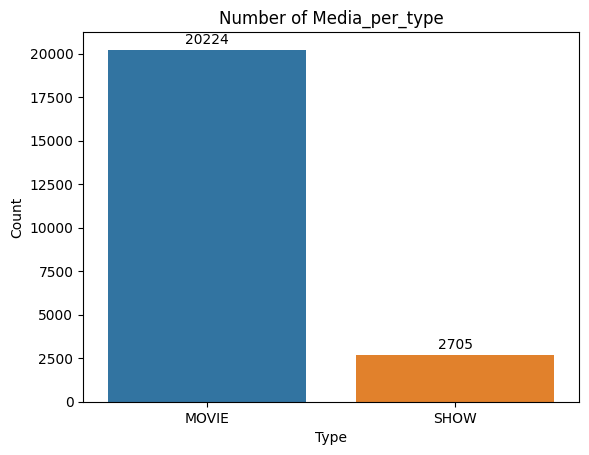

In [22]:
ax = sns.countplot(data=df, x='type', hue='type')

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Number of Media_per_type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data/Number of Media_per_type.png")
plt.show()

Observation: In the dataset, the observations include 20,224 movies and 2,705 shows.

#### Figure 2. ** Histplot for observing distribution of IMDb Scores in the dataset for movies / shows. **

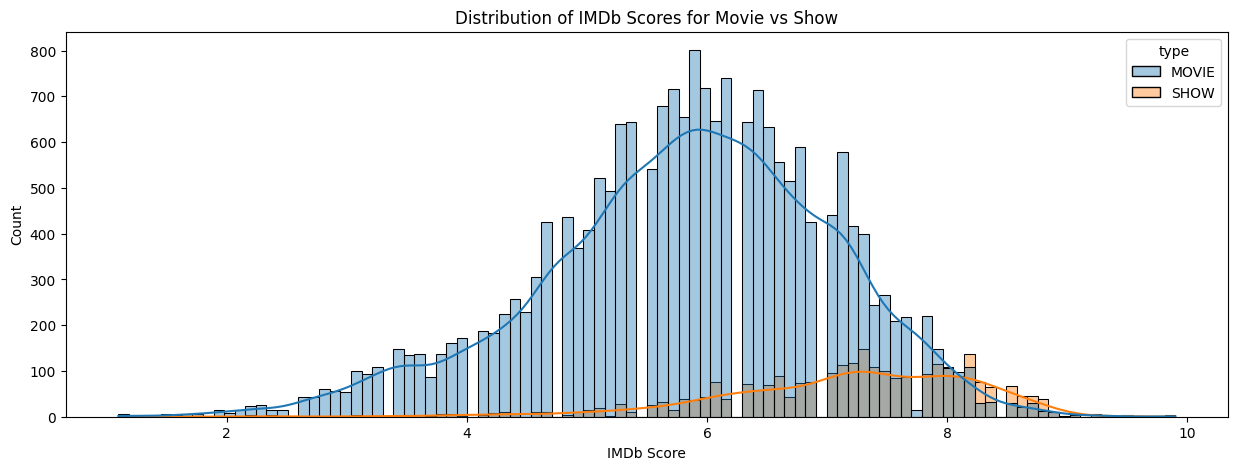

In [23]:
plt.figure(figsize = (15,5))
sns.histplot(
    data=df,
    x="imdb_score",      # numeric column
    hue="type",          # categorical column (MOVIE / SHOW)
    bins=100,
    alpha=0.4,
    kde=True
)

plt.title("Distribution of IMDb Scores for Movie vs Show")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.savefig("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data//IMDb scores distribution movies vs show.png")
plt.show()

Observation: The distribution shows that IMDb scores for shows are generally higher than those for movies, while movie ratings follow a roughly normal distribution that is slightly skewed to the right.

#### Figure 3. ** Number of movies per genre of  media. **

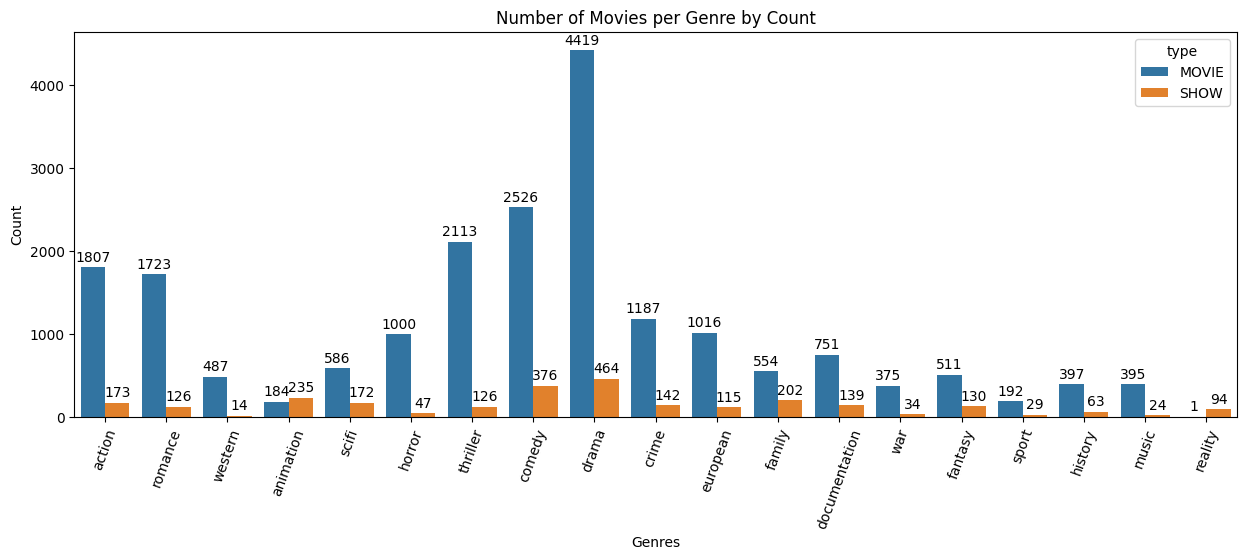

In [24]:
# countplot for different genres of media
plt.figure(figsize = (15,5))
ax = sns.countplot(data=df, x='genres', hue='type')

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)


plt.title('Number of Movies per Genre by Count')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.savefig("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data/Number of Movies_per_genres.png")
plt.show()

Observation: The genre with the highest production of movies and shows is Drama, with 4,419 movies and 464 shows.

#### Figure 4. ** Number of Titles Released per Year **

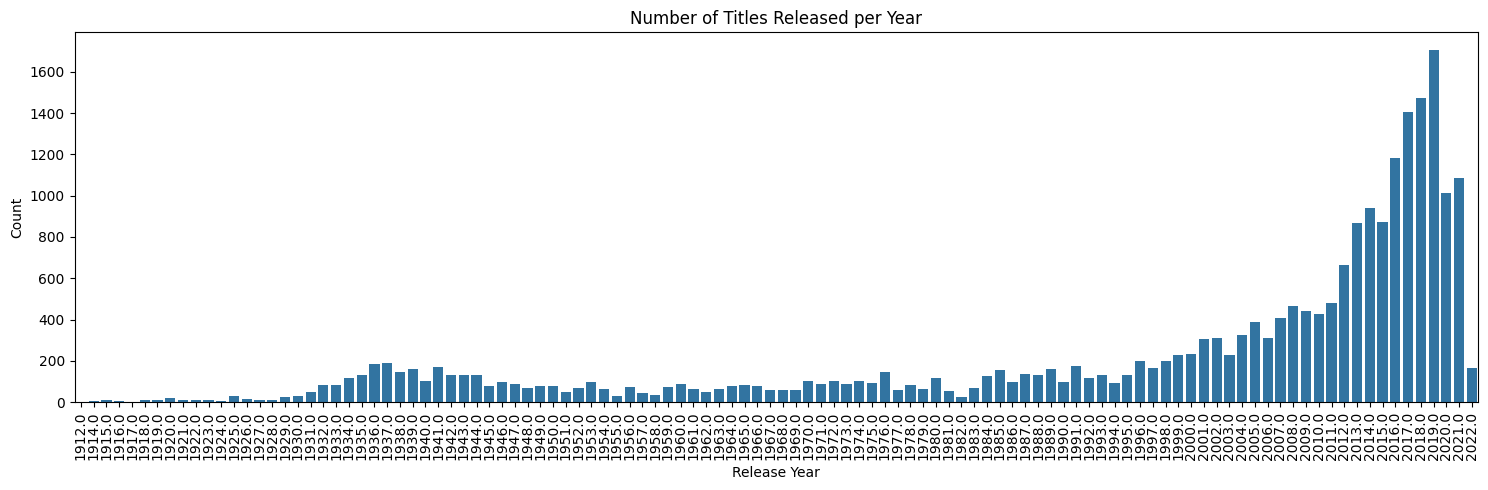

In [25]:
plt.figure(figsize=(15,5))

sns.countplot(
    data=df,
    x="release_year",
    order=sorted(df["release_year"].unique()),
)

plt.title("Number of Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data/Number of Titles Released per Year.png")
plt.show()

Observation: Media production increased steadily from 1996 to 2011, followed by a noticeable spike after 2011.

#### **Figure 5. Distribution of IMDb scores Vs TMDB Scores**

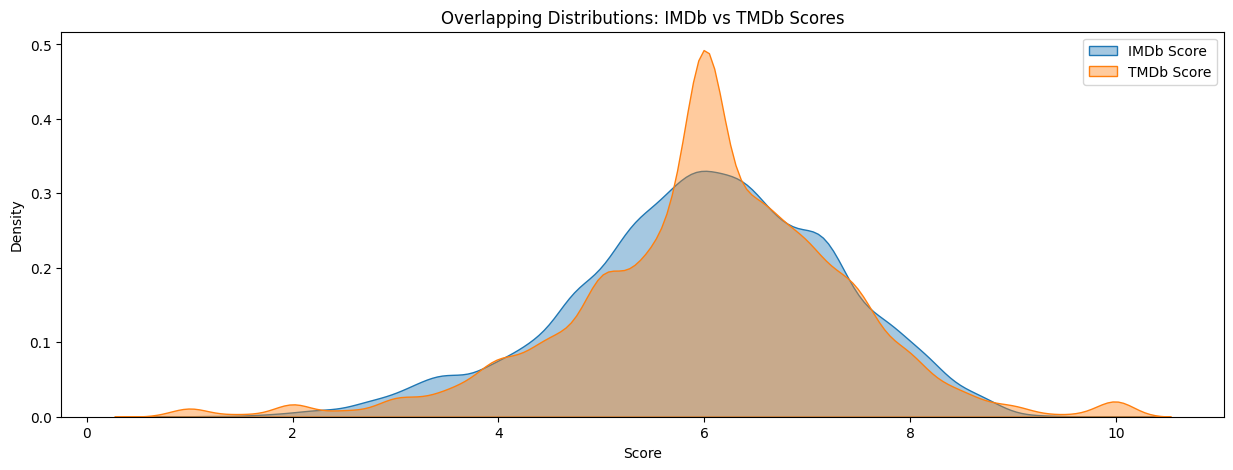

In [26]:
plt.figure(figsize=(15,5))

sns.kdeplot(df["imdb_score"], fill=True, alpha=0.4, label="IMDb Score")
sns.kdeplot(df["tmdb_score"], fill=True, alpha=0.4, label="TMDb Score")

plt.title("Overlapping Distributions: IMDb vs TMDb Scores")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.savefig("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data/Overlapping Distributions: IMDb vs TMDb Scores.png")
plt.show()

Observation: Both scores show a similar trend of a normal distribution, slightly skewed to the right of the mean (5). TMDb scores tend to cluster more around 6 compared to IMDb.

In [27]:
actps = pd.merge(tls[['id','title', 'release_year']],crds[['id', 'name', 'role']], on = 'id', how = 'inner')
actps.head(3)

,id,title,release_year,name,role
0,ts20945,The Three Stooges,1934,Joe Besser,ACTOR
1,ts20945,The Three Stooges,1934,Moe Howard,ACTOR
2,ts20945,The Three Stooges,1934,Larry Fine,ACTOR


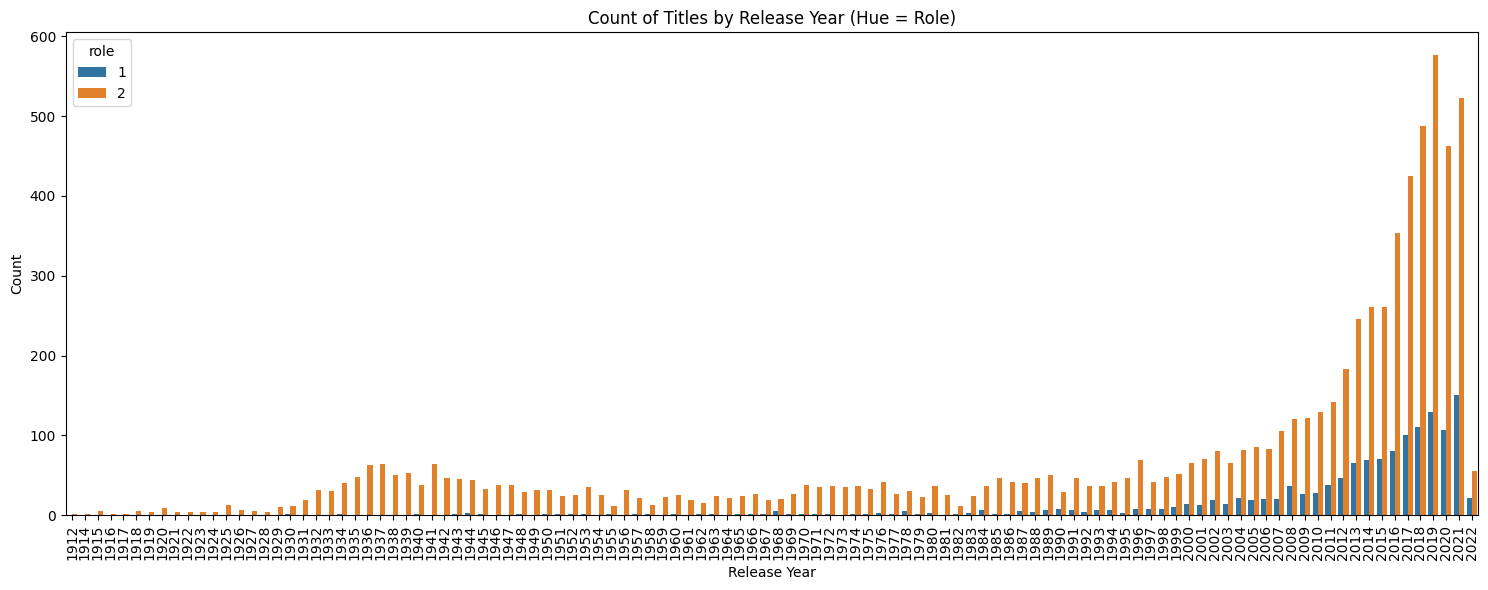

In [28]:
title_counts = actps.groupby(['title','release_year'])['role'].nunique().reset_index()

plt.figure(figsize=(15,6))
plt.xlabel("Release Year")
plt.ylabel("Count")
sns.countplot(data=title_counts, x="release_year", hue="role", palette=["#1f77b4", "#ff7f0e"])
plt.title("Count of Titles by Release Year (Hue = Role)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data/Number of Titles Released per Year.png")
plt.show()

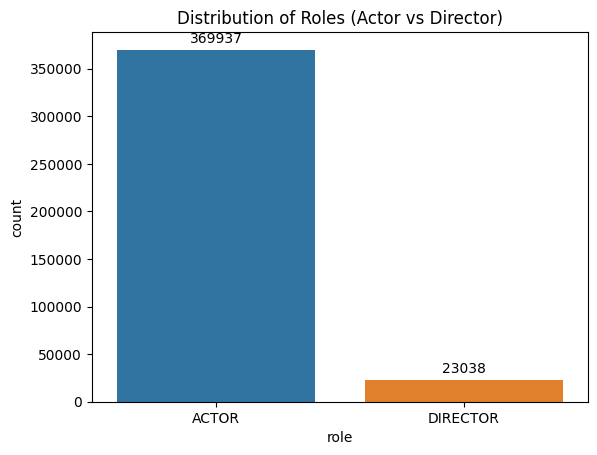

In [29]:
x = actps.groupby(['title'])['role'].nunique().reset_index()
ax = sns.countplot(data=actps, x="role", hue="role")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title("Distribution of Roles (Actor vs Director)")
plt.savefig("/content/drive/MyDrive/Capstone_Projects_Almabetter/Capstone Project 2/Amazon Prime streaming Data/Distribution of Roles per volume.png")
plt.show()